# F21 AA. CW 1
# TASK 5 Topic Modelling

Import

In [25]:
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Input

In [26]:
# Preprocessed data from step 2 which used Stemming
df_reviews_p_l = pd.read_csv('df_reviews_p_l.csv')
df_reviews_p_l.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good received product early seller tastey grea...,109,16,98,24
1,1,5,organic kosher tasty assortment premium tea te...,1334,193,664,126
2,2,5,excellent glutenfree spaghetti great taste gre...,690,101,456,103
3,3,5,lindt lindt buying multipack misled picture wh...,138,19,63,15
4,4,5,yum bar good loved warmed definitely think gre...,98,14,66,15


Split into 1 star and 5 star ratings and subsample 30,000 rows for both

1 Star

In [27]:
df_reviews_1Star=df_reviews_p_l[df_reviews_p_l['Score']==1]

In [28]:
df_reviews_1Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
18,18,1,plastic taste first coffee tried got keurig di...,243,36,112,28
31,31,1,dangerous doggy dont buy large german shepherd...,170,27,132,32
49,49,1,ugh fake food wanted sugar splurge chose short...,199,27,65,13
55,55,1,worst product ever chinese never brought produ...,147,23,94,22
56,56,1,enormous ripoff nearly twice expensive cost ne...,104,14,52,11
...,...,...,...,...,...,...,...
426306,426306,1,pleased coffee drinker know good coffee one pa...,56,9,40,11
426307,426307,1,two leaf blah saw chai tea shopping tazo chai ...,323,55,240,58
426309,426309,1,evangers buffalo fruit vegtable treat would ne...,134,20,98,24
426325,426325,1,great product item near expiration received it...,298,50,176,42


In [29]:
df_reviews_1Star.sample(frac =30000/len(df_reviews_1Star)) 

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
377445,377445,1,beer nut nut stale tastless tried get refund s...,70,12,54,14
350313,350313,1,sadly disappointed bought one year annivsary t...,193,32,95,24
383743,383743,1,new formula contains natural flavor family use...,404,57,301,60
69076,69076,1,taste good got passion fruit coconut water tas...,157,26,103,23
107649,107649,1,stale cooky sadly cooky shipment soft crunchy ...,66,11,83,16
...,...,...,...,...,...,...,...
347518,347518,1,overpriced others noted overpriced grocery ite...,172,28,113,25
104432,104432,1,ceylon cinnamon quality horrible brought think...,205,29,83,19
244616,244616,1,bacon gum ordered gum daughter missing 2 piece...,88,14,52,13
183030,183030,1,warning dog food warning warning dog food fed ...,276,47,197,42


5 Star

In [30]:
df_reviews_5Star=df_reviews_p_l[df_reviews_p_l['Score']==5]

In [31]:
df_reviews_5Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good received product early seller tastey grea...,109,16,98,24
1,1,5,organic kosher tasty assortment premium tea te...,1334,193,664,126
2,2,5,excellent glutenfree spaghetti great taste gre...,690,101,456,103
3,3,5,lindt lindt buying multipack misled picture wh...,138,19,63,15
4,4,5,yum bar good loved warmed definitely think gre...,98,14,66,15
...,...,...,...,...,...,...,...
426333,426333,5,yum current favorite tea basically given lipto...,94,16,44,10
426334,426334,5,wow grandma work growing southwest refried bea...,346,54,214,53
426336,426336,5,antifatigue fantastic product im relatively ne...,1362,215,835,201
426337,426337,5,always right formula trust brandthe flavor ble...,110,16,41,9


In [32]:
df_reviews_5Star=df_reviews_5Star.sample(frac =30000/len(df_reviews_5Star)) 

In [33]:
df_reviews_5Star

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
406317,406317,5,worth trying bold blend good cup coffee strong...,135,21,115,27
72335,72335,5,tasty enjoy product sweet like fizz heavy tast...,83,13,87,20
48877,48877,5,tasty vanilla latte tastier price great flavou...,150,23,57,12
98575,98575,5,great soup thoroughly enjoyed soup taste great...,83,13,34,8
65051,65051,5,excellent flavor difficult time finding dinner...,231,38,160,39
...,...,...,...,...,...,...,...
397344,397344,5,massmarket drugstore chocolate excellent dark ...,351,43,164,32
64426,64426,5,shortage potato mild comforting soup think one...,356,54,185,42
129994,129994,5,great taste honeytree mother hubbard golden mo...,137,21,65,17
391867,391867,5,delicious health packet treat thats also nutri...,93,12,27,6


## TOPIC MODELLING

### a) 1 Star ratings

Vectorize to extract features

In [34]:
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(df_reviews_1Star['Summary_text'])

Use Latent Dirichlet Allocation algorithm to build vocabulary for 10 topics

In [35]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

In [36]:
document_topics = lda.fit_transform(X)

Check shape of model

In [37]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 1000)


Sort and get feature names

In [38]:

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

Display 10 topics 

In [39]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
tea           coffee        dog           chocolate     sugar         
water         cup           treat         chip          ingredient    
drink         kcups         time          oil           free          
coconut       bean          bag           bar           artificial    
green         pod           day           salt          corn          
bottle        machine       work          cooky         natural       
leaf          kcup          hard          milk          syrup         
tried         blend         piece         butter        sweet         
seed          weak          didnt         fat           fruit         
brand         ground        first         peanut        gluten        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
food

Remodel for 100 topics

In [40]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

randomly choose  15 topics to display

In [41]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

Sort and Display topics

In [42]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
texture       cost          diet          contains      terrible      
soy           le            food          low           stick         
tasty         per           science       avoid         cracker       
person        expensive     animal        manufacturer  ill           
unpleasant    ounce         please        warning       lack          
eating        much          vet           effect        nothing       
found         weight        evo           may           try           
could         lb            cat           search        love          
also          better        research      heart         maybe         
hard          count         hill          level         least         
tried         total         pet           many          look          
little        time          feed          toxic         trash         
compan

Plot

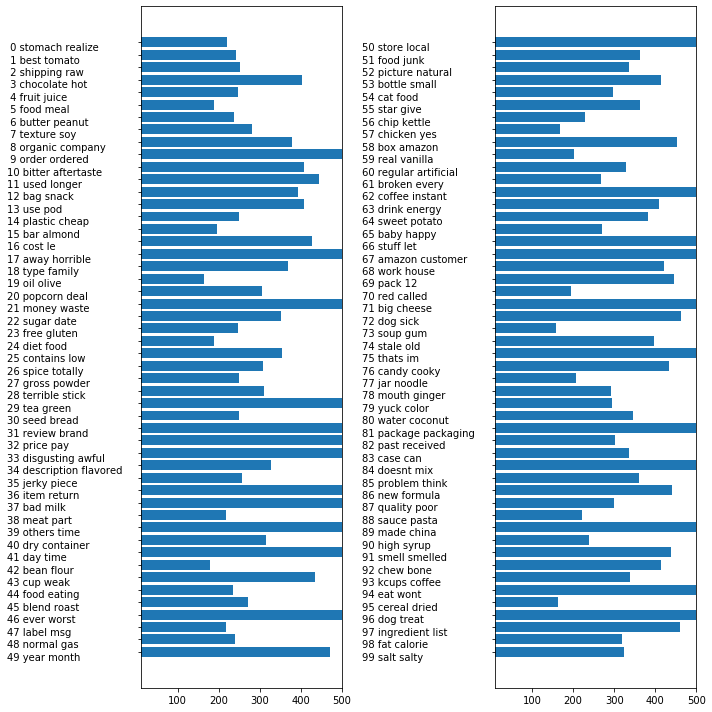

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(10, 500)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

## 2) 5 Star Ratings 

Vectorize to extract features

In [44]:
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(df_reviews_5Star['Summary_text'])

Use Latent Dirichlet Allocation algorithm to build vocabulary for 10 topics

In [45]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

In [46]:
document_topics = lda.fit_transform(X)

Check shape of model

In [47]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 1000)


Sort and get feature names

In [48]:

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

Display 10 topics 

In [49]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
tea           treat         oil           food          amazon        
drink         dog           use           cat           store         
water         time          sauce         dog           price         
green         day           cereal        eat           find          
hot           bag           rice          diet          buy           
cup           little        add           dry           local         
bag           work          hot           brand         found         
day           keep          salt          ingredient    grocery       
drinking      small         bread         year          year          
also          use           soup          healthy       buying        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
choc

Remodel for 100 topics

In [50]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

randomly choose  15 topics to display

In [51]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

Sort and Display topics

In [52]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
chip          ive           eating        coffee        rice          
potato        yet           stop          starbucks     meal          
kettle        tried         plain         instant       cook          
bbq           havent        alone         drink         brown         
salty         review        crisp         shop          cooked        
eat           star          stand         better        oat           
baked         strawberry    dip           much          cut           
crunchy       berry         replacement   drinker       cooking       
sweet         ever          eat           ever          use           
crunch        im            allergic      ive           texture       
snack         id            delicious     tasting       food          
brand         outstanding   enjoy         house         time          
ever  

plot

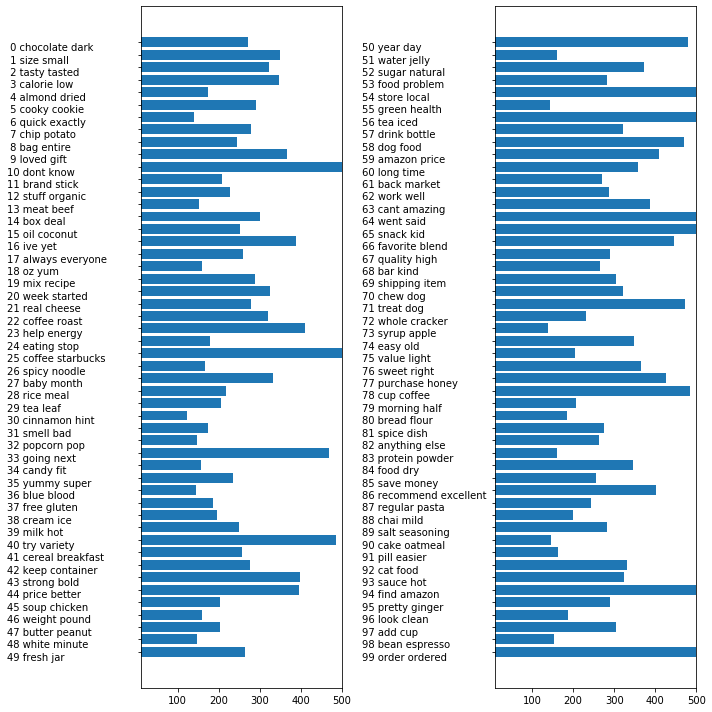

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(10,500)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()